In [1]:
import os

import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.pyplot as plt
import numpy as np

PPO_HumanHeartDipole_1337.csv (1500,)
PPO_HumanHeartDipole_250197.csv (1500,)
PPO_HumanHeartDipole_42.csv (1500,)
PPO_HumanHeartDipole_541.csv (1500,)
PPO_HumanHeartDipole_123.csv (1500,)
PPO_HumanHeartDipole_1743.csv (1500,)


/tmp/ipykernel_1507388/4104460181.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


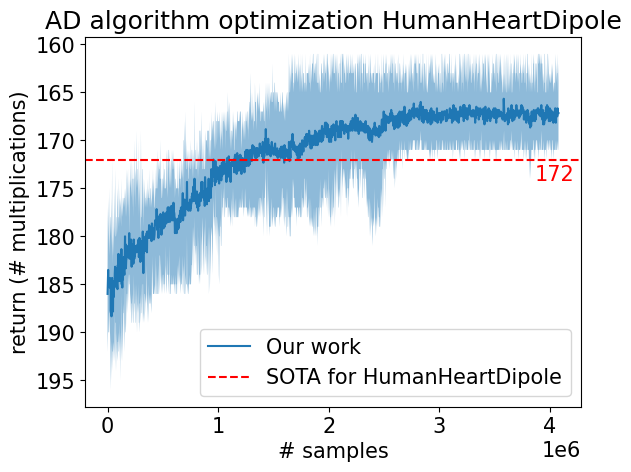

In [8]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc("font", **font)

path = "PPO_data/" # "A0_data/" # 
l = 1500 # 1500

runs = []
for file in os.listdir(path=os.path.join(os.getcwd(), path)):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), path, file), delimiter=",", skip_header=1)
								num_samples = data[:l, 0]*32*85
								num_muls = data[:l, 1]
								print(file, num_muls.shape)
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)
data_err = jnp.stack([data_min, data_max], axis=0)


fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-172., color="r", linestyle="--", label="SOTA for HumanHeartDipole")
ax.annotate("172", (num_samples[-1], -172), textcoords="offset points", xytext=(-3, -15), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization HumanHeartDipole")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [2]:
from graphax.perf import plot_performance
from graphax.examples import HumanHeartDipole

In [3]:
# 148 mults
order = [19, 85, 11, 83, 77, 59, 81, 22, 76, 1, 9, 37, 49, 68, 69, 7, 3, 45, 51, 
         17, 75, 34, 66, 36, 61, 73, 71, 48, 79, 57, 40, 8, 24, 43, 39, 21, 52, 
         53, 16, 56, 67, 28, 42, 54, 33, 31, 30, 74, 10, 27, 47, 63, 44, 46, 6, 
         72, 32, 58, 55, 15, 41, 29, 13, 82, 80, 25, 26, 18, 14, 62, 5, 60, 84, 
         35, 64, 23, 65, 70] 

mM_order = [21, 22, 24, 25, 28, 34, 40, 46, 51, 52, 53, 56, 57, 58, 61, 62, 63, 
            66, 67, 68, 1, 3, 5, 6, 8, 10, 13, 14, 16, 18, 27, 29, 32, 35, 37, 
            39, 41, 44, 47, 49, 54, 59, 64, 69, 71, 72, 74, 76, 79, 80, 82, 84, 
            9, 17, 30, 33, 36, 42, 45, 48, 75, 83, 7, 15, 23, 26, 31, 43, 55, 
            60, 65, 70, 73, 81, 11, 19, 77, 85] 

In [4]:
key = jrand.PRNGKey(42)
shape = (512,)
xs = [.01, .03, .02, .0112, .06, .04, .07, .099]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
HumanHeartDipole(*xs)

(Array([-0.9676056 , -0.984595  , -0.97307706, -0.97889614, -0.97216463,
        -0.9646186 , -0.99772924, -0.96178436, -0.9784801 , -0.9614124 ,
        -0.9867246 , -0.9678472 , -0.9966013 , -0.99661845, -0.9756957 ,
        -0.99077386, -0.99196434, -0.9638022 , -0.9791845 , -0.98391896,
        -0.96769667, -0.9602833 , -0.98074883, -0.99500287, -0.9841962 ,
        -0.98128015, -0.9833594 , -0.9975779 , -0.9624574 , -0.96309125,
        -0.97236353, -0.98155355, -0.9631246 , -0.98116225, -0.97512066,
        -0.97208244, -0.9837958 , -0.9925284 , -0.9844956 , -0.98807514,
        -0.96878225, -0.9791126 , -0.9860835 , -0.9869385 , -0.9997464 ,
        -0.96636283, -0.968409  , -0.9669562 , -0.96815634, -0.9673913 ,
        -0.9971656 , -0.9654215 , -0.97575396, -0.9709341 , -0.97167283,
        -0.9704624 , -0.9955065 , -0.9794424 , -0.9839417 , -0.9810218 ,
        -0.9999974 , -0.9676548 , -0.9777923 , -0.9900516 , -0.9603514 ,
        -0.9623436 , -0.9802496 , -0.99368054, -0.9

  0%|          | 0/1000 [00:00<?, ?it/s]

19 : 1024
85 : 1024
11 : 1024
83 : 1024
77 : 1024
59 : 1024
81 : 1024
22 : 512
76 : 1024
1 : 1024
9 : 1024
37 : 1024
49 : 1024
68 : 512
69 : 1024
7 : 1024
3 : 1024
45 : 1024
51 : 512
17 : 1024
75 : 1024
34 : 512
66 : 512
36 : 1024
61 : 512
73 : 1024
71 : 1024
48 : 1024
79 : 1024
57 : 512
40 : 512
8 : 1024
24 : 512
43 : 1024
39 : 1024
21 : 512
52 : 512
53 : 512
16 : 1024
56 : 512
67 : 512
28 : 512
42 : 1024
54 : 1024
33 : 1024
31 : 1024
30 : 1024
74 : 1024
10 : 1024
27 : 1024
47 : 1024
63 : 512
44 : 1024
46 : 512
6 : 1024
72 : 1024
32 : 1024
58 : 512
55 : 2048
15 : 1024
41 : 1024
29 : 1024
13 : 1024
82 : 1024
80 : 1024
25 : 512
26 : 2048
18 : 1024
14 : 1024
62 : 512
5 : 1024
60 : 2048
84 : 1024
35 : 1024
64 : 1024
23 : 2048
65 : 2048
70 : 2048


  0%|          | 0/1000 [00:00<?, ?it/s]

21 : 512
22 : 512
24 : 512
25 : 512
28 : 512
34 : 512
40 : 512
46 : 512
51 : 512
52 : 512
53 : 512
56 : 512
57 : 512
58 : 512
61 : 512
62 : 512
63 : 512
66 : 512
67 : 512
68 : 512
1 : 1024
3 : 1024
5 : 1024
6 : 1024
8 : 1024
10 : 1024
13 : 1024
14 : 1024
16 : 1024
18 : 1024
27 : 1024
29 : 1024
32 : 1024
35 : 1024
37 : 1024
39 : 1024
41 : 1024
44 : 1024
47 : 1024
49 : 1024
54 : 1024
59 : 1024
64 : 1024
69 : 1024
71 : 1024
72 : 1024
74 : 1024
76 : 1024
79 : 1024
80 : 1024
82 : 1024
84 : 1024
9 : 1536
17 : 1536
30 : 1536
33 : 1536
36 : 1536
42 : 1536
45 : 1536
48 : 1536
75 : 1536
83 : 1536
7 : 2048
15 : 2048
23 : 2048
26 : 2048
31 : 2048
43 : 2048
55 : 2048
60 : 2048
65 : 2048
70 : 2048
73 : 2048
81 : 2048
11 : 4096
19 : 4096
77 : 4096
85 : 4096


  0%|          | 0/1000 [00:00<?, ?it/s]

85 : 1024
84 : 1024
83 : 1024
82 : 1024
81 : 1024
80 : 1024
79 : 1024
77 : 1024
76 : 1024
75 : 1024
74 : 1024
73 : 1024
72 : 1024
71 : 1024
70 : 2048
69 : 2048
68 : 1024
67 : 1024
66 : 1024
65 : 2048
64 : 2048
63 : 1024
62 : 1024
61 : 1024
60 : 2048
59 : 2048
58 : 1024
57 : 1024
56 : 1024
55 : 2048
54 : 2048
53 : 1024
52 : 1024
51 : 1024
49 : 1024
48 : 1024
47 : 1024
46 : 512
45 : 1024
44 : 1024
43 : 1024
42 : 1024
41 : 1024
40 : 512
39 : 1024
37 : 1024
36 : 1024
35 : 1024
34 : 512
33 : 1024
32 : 1024
31 : 1024
30 : 1024
29 : 1024
28 : 512
27 : 1024
26 : 2048
25 : 1024
24 : 1024
23 : 2048
22 : 1024
21 : 1024
19 : 1024
18 : 1024
17 : 1024
16 : 1024
15 : 1024
14 : 1024
13 : 1024
11 : 1024
10 : 1024
9 : 1024
8 : 1024
7 : 1024
6 : 1024
5 : 1024
3 : 1024
1 : 1024


  0%|          | 0/1000 [00:00<?, ?it/s]

1 : 1024
3 : 1024
5 : 1024
6 : 1024
7 : 2048
8 : 1024
9 : 3072
10 : 1024
11 : 4096
13 : 1024
14 : 1024
15 : 2048
16 : 1024
17 : 3072
18 : 1024
19 : 4096
21 : 512
22 : 512
23 : 2048
24 : 512
25 : 512
26 : 2048
27 : 1536
28 : 512
29 : 1024
30 : 1536
31 : 2048
32 : 1536
33 : 3584
34 : 512
35 : 1024
36 : 1536
37 : 4096
39 : 1536
40 : 512
41 : 1024
42 : 1536
43 : 2048
44 : 1536
45 : 3584
46 : 512
47 : 1024
48 : 1536
49 : 4096
51 : 512
52 : 512
53 : 512
54 : 1024
55 : 2048
56 : 512
57 : 512
58 : 512
59 : 1024
60 : 2048
61 : 512
62 : 512
63 : 512
64 : 1024
65 : 2048
66 : 512
67 : 512
68 : 512
69 : 1024
70 : 2048
71 : 1536
72 : 1536
73 : 2048
74 : 1536
75 : 3584
76 : 1536
77 : 4096
79 : 1536
80 : 1536
81 : 2048
82 : 1536
83 : 3584
84 : 1536
85 : 4096


100%|██████████| 1000/1000 [00:20<00:00, 47.91it/s]


fwd mean: 16.970426559448242, rev mean: 16.870729446411133, mM mean: 16.42045021057129, cc mean: 15.946763038635254
fwd err: [-2.392252   1.2329903], rev err: [-3.9023256  1.4569931], mM err: [-2.733653   1.2924061], cc err: [-1.1027699  1.1138105]


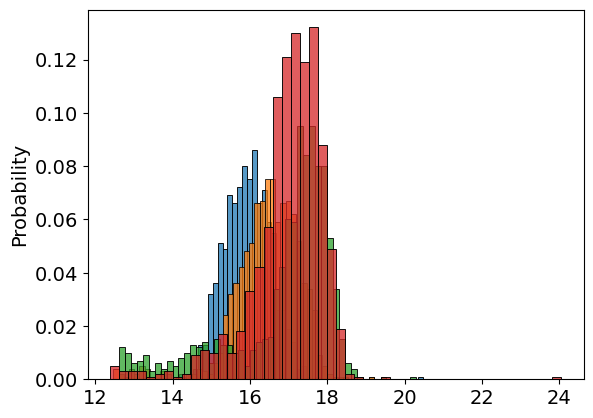

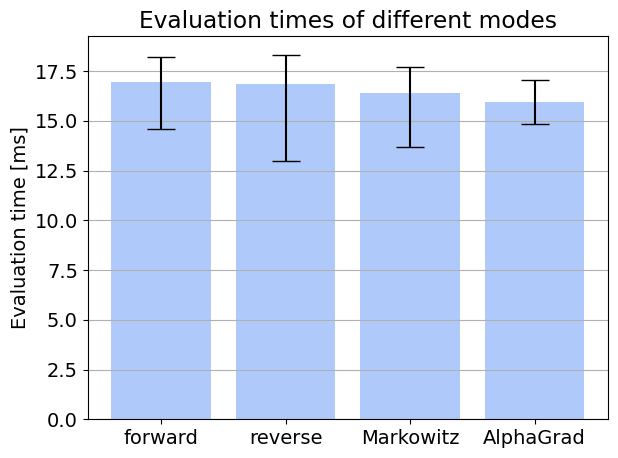

In [8]:
plot_performance(HumanHeartDipole, xs, order, mM_order, "./HumanHeartDipole.png", samplesize=1000)

  0%|          | 0/110 [00:00<?, ?it/s]

100%|██████████| 110/110 [00:27<00:00,  3.97it/s]


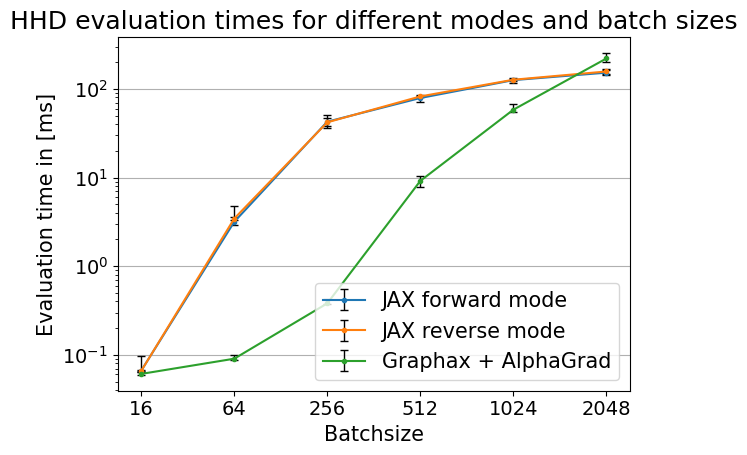

In [5]:
from graphax.perf import plot_performance_over_size_jax

shapes = (16, 64, 256, 512, 1024, 2048)
key = jrand.PRNGKey(1234)
xs = [.01, .03, .02, .0112, .06, .04, .07, .099]
xs = [[jrand.uniform(key, (shape,))*x for x in xs] for shape in shapes]
xs = jax.device_put(xs, jax.devices("cpu")[0])

plot_performance_over_size_jax(HumanHeartDipole, xs, order, "HHD", ticks=shapes, samplesize=110)